In [1]:
from customized.main.DatasetManager import DatasetManager
from customized.main.Evaluator import Evaluator
from customized.main.models.ClusteredUserBasedCF import ClusteredUserBasedCF
from customized.main.models.ItemBasedCF import ItemBasedCF
from customized.main.models.UserBasedCF import UserBasedCF
from customized.main.utils.plot_generators import gen_plots_with_errbars, measure_time
import numpy as np

In [2]:
dirname = '/home/damian/Pulpit/Warsztat/CoML/recomm_project/data/'
dm = DatasetManager()

# ml100k_filename = dirname + 'ml-100k/u.data'
# data = dm.load_csv(ml100k_filename, realative=False)
# train, test = dm.train_test_split(data, shuffle=False)
# 
# user_item = dm.transform_to_user_item_mat(train, verbose=True)
# user_item_test = dm.transform_to_user_item_mat(test, verbose=True)

In [3]:
ml100k_filename = dirname + 'ml-100k/ua.base'
ml100k_filename_test = dirname + 'ml-100k/ua.test'

train = dm.load_csv(ml100k_filename, realative=False)
test = dm.load_csv(ml100k_filename_test, realative=False)

user_item = DatasetManager.transform_to_user_item_mat(train, verbose=True)
user_item_test = DatasetManager.transform_to_user_item_mat(test, verbose=True)
    

User number: 943, item number: 1682
User number: 943, item number: 1664


(0) started calculation for UserBasedCF case
[UserBasedCF.fit] total 5.22 seconds have spent

[UserBasedCF.predict_all] total 1.55 seconds have spent

[UserBasedCF.fit] total 5.25 seconds have spent

[UserBasedCF.predict_all] total 1.52 seconds have spent

[UserBasedCF.fit] total 5.21 seconds have spent

[UserBasedCF.predict_all] total 1.53 seconds have spent

>>> results for value 1: 
  >>> time - y: 1.5344254970550537, err: 0.008634848573317658
  >>> prec - y: 0.029798515376458112, err: 0.0
  >>> recall - y: 0.029798515376458112, err: 0.0
  >>> f1 - y: 0.029798515376458112, err: 0.0
  >>> rmse - y: 3.573364255952272, err: 0.0
  >>> mae - y: 3.386586815927623, err: 0.0
[UserBasedCF.fit] total 5.25 seconds have spent

[UserBasedCF.predict_all] total 2.78 seconds have spent

[UserBasedCF.fit] total 5.17 seconds have spent

[UserBasedCF.predict_all] total 2.71 seconds have spent

[UserBasedCF.fit] total 5.25 seconds have spent

[UserBasedCF.predict_all] total 2.79 seconds have spent

>>>

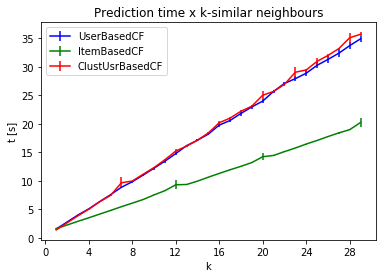

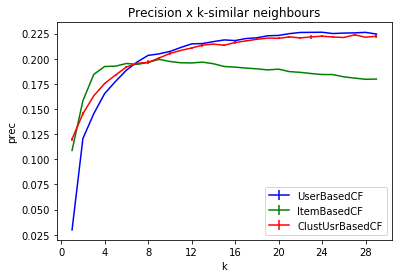

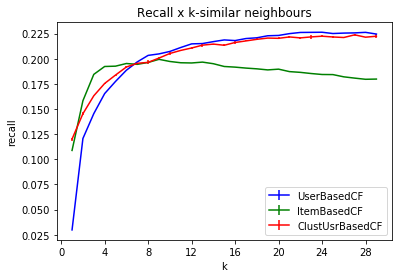

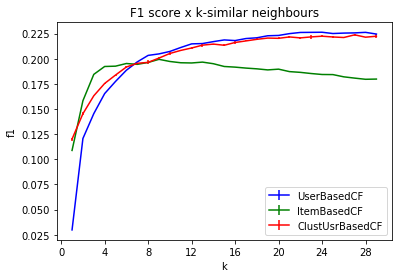

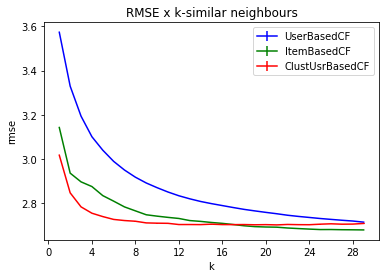

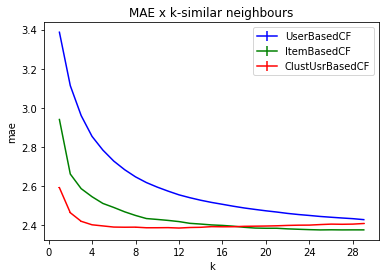

In [4]:
# eval metrics accross different k neighbours

plots = [
    {'key': 'time', 'name': 'Prediction time x k-similar neighbours', 'xlabel': 'k', 'ylabel': 't [s]'},
    {'key': 'prec', 'name': 'Precision x k-similar neighbours', 'xlabel': 'k', 'ylabel': 'prec'},
    {'key': 'recall', 'name': 'Recall x k-similar neighbours', 'xlabel': 'k', 'ylabel': 'recall'},
    {'key': 'f1', 'name': 'F1 score x k-similar neighbours', 'xlabel': 'k', 'ylabel': 'f1'},
    {'key': 'rmse', 'name': 'RMSE x k-similar neighbours', 'xlabel': 'k', 'ylabel': 'rmse'},
    {'key': 'mae', 'name': 'MAE x k-similar neighbours', 'xlabel': 'k', 'ylabel': 'mae'}
]

models = [
    { 'model': UserBasedCF, 'name': 'UserBasedCF'},
    { 'model': ItemBasedCF, 'name': 'ItemBasedCF'},
    { 'model': ClusteredUserBasedCF, 'name': 'ClustUsrBasedCF'}
]

k_range = np.arange(1, 30)
repeat = 3

def func(sink, model_desc, k):
    model_class = model_desc['model']
    model = model_class(k_similar=k, verbose=True)
    
    # fit model 
    model.fit(user_item)
    
    # predict
    pred = measure_time(lambda: model.predict_all(), sink['time'])
    
    # recommend
    recomm, _ = model._recommend_all(pred)
    recomm = model._transform_recomm(recomm)

    # eval
    eval = Evaluator(user_item_test).eval(recomm, pred)
    
    sink['prec'].append(eval['prec'])
    sink['recall'].append(eval['recall'])
    sink['f1'].append(eval['f1'])
    sink['rmse'].append(eval['rmse'])
    sink['mae'].append(eval['mae'])


gen_plots_with_errbars(plots, models, k_range, func, repeat, verbose=True)